# **Data Analysis of Zomato Restaurants Dataset**

# **Problem Statement**:
The goal of this project is to perform exploratory data analysis (EDA) on the Zomato Restaurants Dataset for Metropolitan Areas of 13 cities in India. We aim to gain insights into various aspects of the restaurant data and answer specific questions related to dining experiences, cuisines, popular dishes, and more.

# **Questions:**

* Which cities have the highest-rated dining experiences?
* How do dining ratings compare to delivery ratings across different cities?
* What are the most popular cuisines in each city?
* Is there a correlation between the number of votes/reviews and the ratings?
* Which dishes/items receive the most votes/reviews?
* What is the distribution of prices for different items?
* Are best-selling dishes more likely to receive higher ratings or more votes?




In [21]:
#Importing Necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset

data = pd.read_csv('/content/zomato_dataset.csv.zip')

In [23]:
# Display the first few rows of the dataset to understand its structure

print(data.head())

  Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER     84   249.0  
1  BESTSELLER     45   129.0  
2         NaN    

In [24]:
# Check for missing values

print(data.isnull().sum())

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64


In [25]:
# Data cleaning steps:

# 1. Handling missing values
# 2. Removing any duplicates

# Handling missing values
data.dropna(inplace=True)

# Removing duplicates
data.drop_duplicates(inplace=True)

In [26]:
print(data.isnull().sum())

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64


#**Data Cleaning:**
* Loaded the dataset and displayed the first few rows to understand its structure.
* Checked for missing values and handled them by dropping rows with missing values.
* Removed duplicate rows from the dataset.
Kept only the relevant columns necessary for analysis.

#**Explanation:**

* We start by importing necessary
libraries such as pandas for data manipulation and matplotlib/seaborn for visualization.
* We load the dataset and display the first few rows to understand its structure.
* We check for missing values using isnull().sum() and handle them accordingly by dropping rows with missing values using dropna().
* We remove any duplicate rows using drop_duplicates().
* Further data cleaning steps may include converting data types if needed, but since the dataset description doesn't mention any specific data type conversions, we skip this step for now.

In [27]:
# Keep only the relevant columns
relevant_columns = ['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes',
                    'Cuisine ', 'Place Name', 'City', 'Item Name', 'Best Seller', 'Votes', 'Prices']

data = data[relevant_columns]

# Verify the dataset after removing unrelated columns
print(data.head())


  Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   
5      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City  \
0               0  Fast Food   Malakpet   Hyderabad   
1               0  Fast Food   Malakpet   Hyderabad   
3               0  Fast Food   Malakpet   Hyderabad   
4               0  Fast Food   Malakpet   Hyderabad   
5               0  Fast Food   Malakpet   Hyderabad   

                           Item Name Best Seller  Votes  Prices  
0                Platter Kebab Combo  BESTSELLER     84   249.0  
1            Chicken Rumali Shawarma  BESTSELLER     45   129.0  
3                  Chicken BBQ Salad  BESTSELLER     43   189.0  
4 

# **Which cities have the highest-rated dining experiences?**

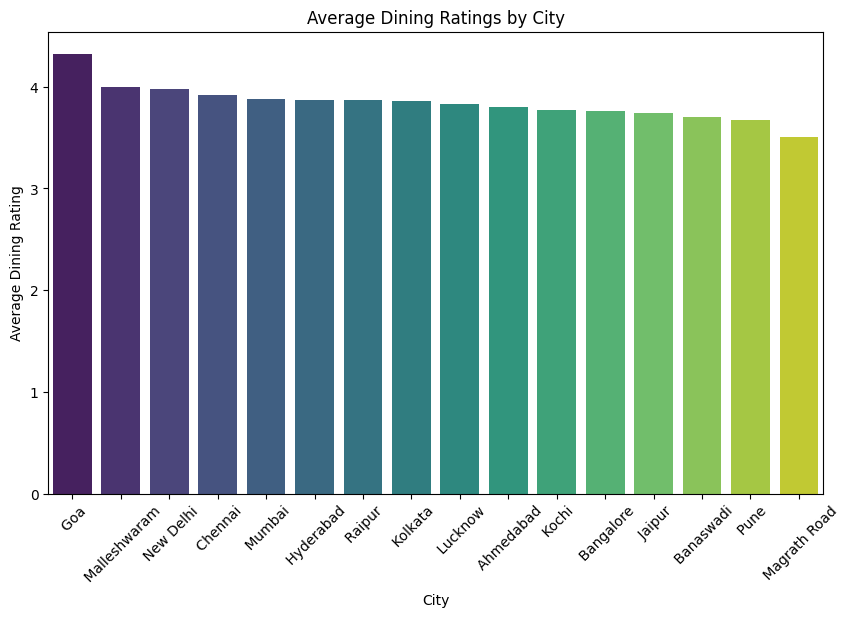

In [28]:
# Group data by city and calculate the mean dining rating
city_dining_ratings = data.groupby('City')['Dining Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=city_dining_ratings.index, y=city_dining_ratings.values, hue=city_dining_ratings.index, palette='viridis', legend=False)
plt.title('Average Dining Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Dining Rating')
plt.xticks(rotation=45)
plt.show()


This visualization will show us the average dining ratings across different cities.

# **How do dining ratings compare to delivery ratings across different cities?**

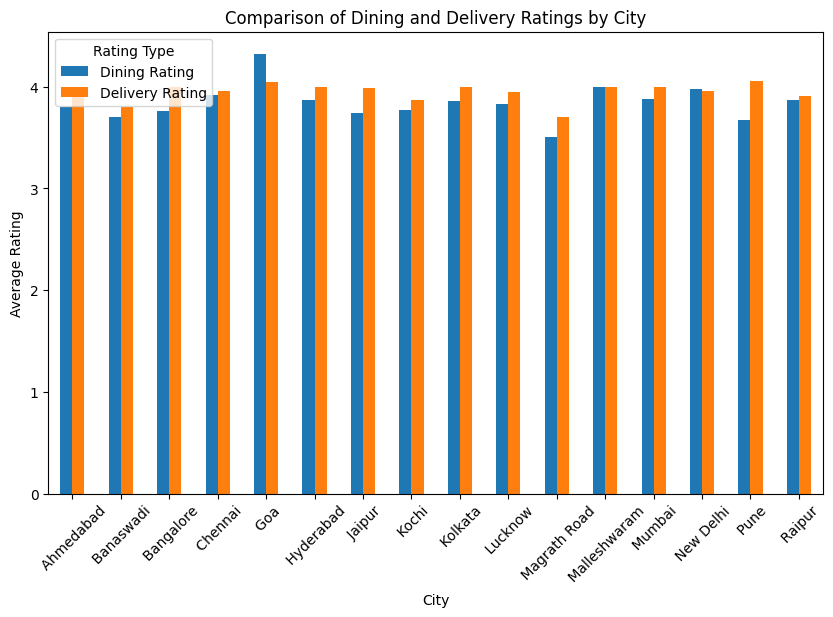

In [29]:
# Group data by city and calculate the mean dining and delivery ratings
city_ratings_comparison = data.groupby('City')[['Dining Rating', 'Delivery Rating']].mean()

# Plotting
city_ratings_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Dining and Delivery Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Rating Type')
plt.show()


This will give us a comparison between dining and delivery ratings across different cities.

# **What are the most popular cuisines in each city?**

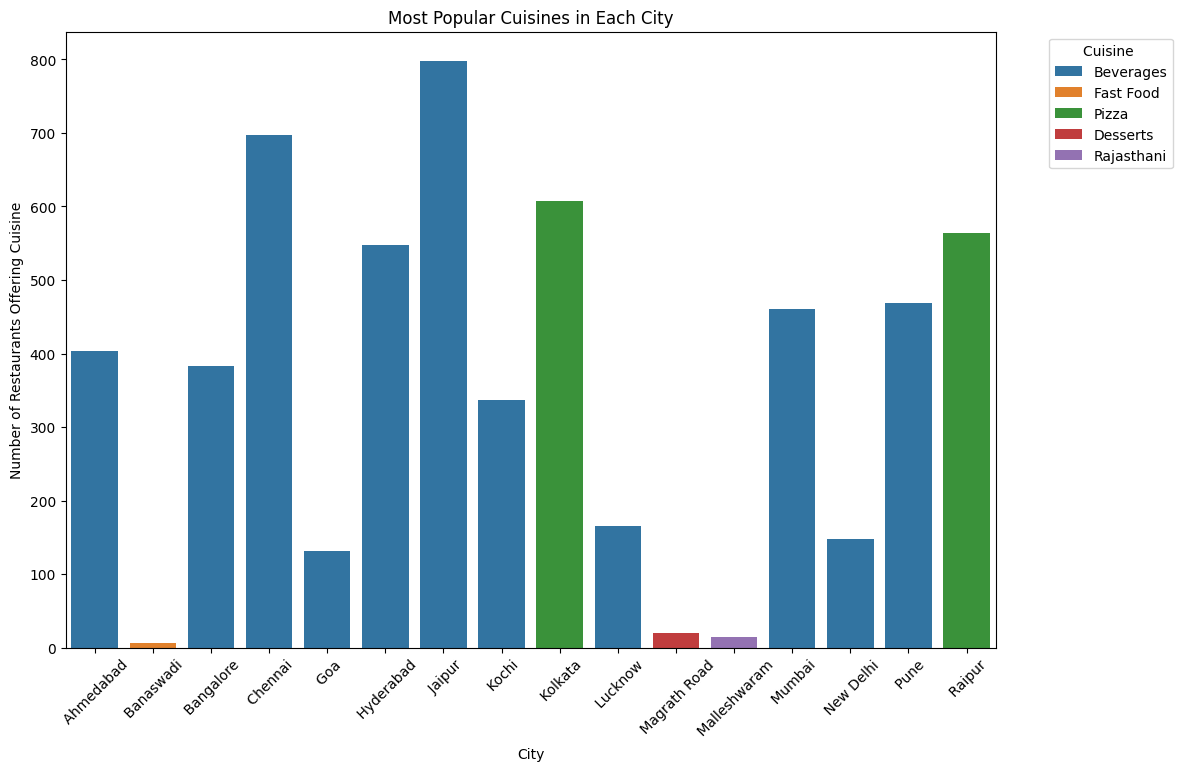

In [33]:
# Count the occurrences of each cuisine in each city
cuisine_counts = data.groupby(['City','Cuisine ']).size().reset_index(name='Count')

# Find the most popular cuisine in each city
idx = cuisine_counts.groupby(['City'])['Count'].transform(max) == cuisine_counts['Count']
most_popular_cuisines = cuisine_counts[idx]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Count', hue='Cuisine ', data=most_popular_cuisines)
plt.title('Most Popular Cuisines in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants Offering Cuisine')
plt.xticks(rotation=45)
plt.legend(title='Cuisine ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This visualization will show the most popular cuisines in each city.

# **Is there a correlation between the number of votes/reviews and the ratings?**

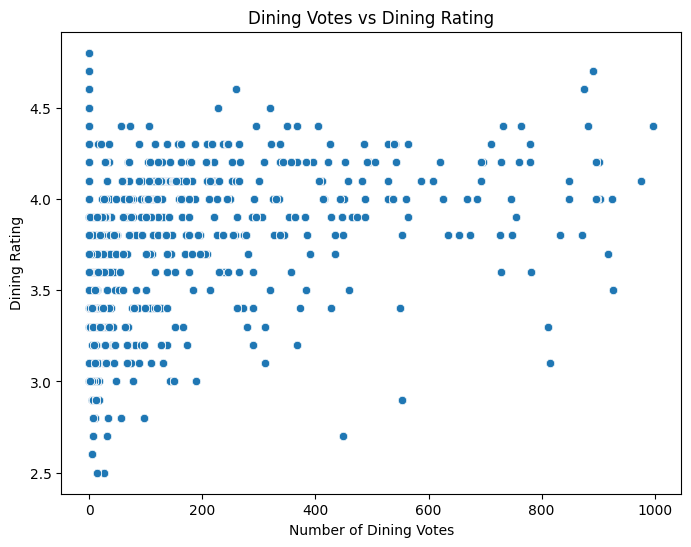

In [34]:
# Scatter plot of dining votes vs dining rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dining Votes', y='Dining Rating', data=data)
plt.title('Dining Votes vs Dining Rating')
plt.xlabel('Number of Dining Votes')
plt.ylabel('Dining Rating')
plt.show()


This scatter plot will help us understand if there's any correlation between the number of dining votes and the dining rating.



#**Which dishes/items receive the most votes/reviews?**

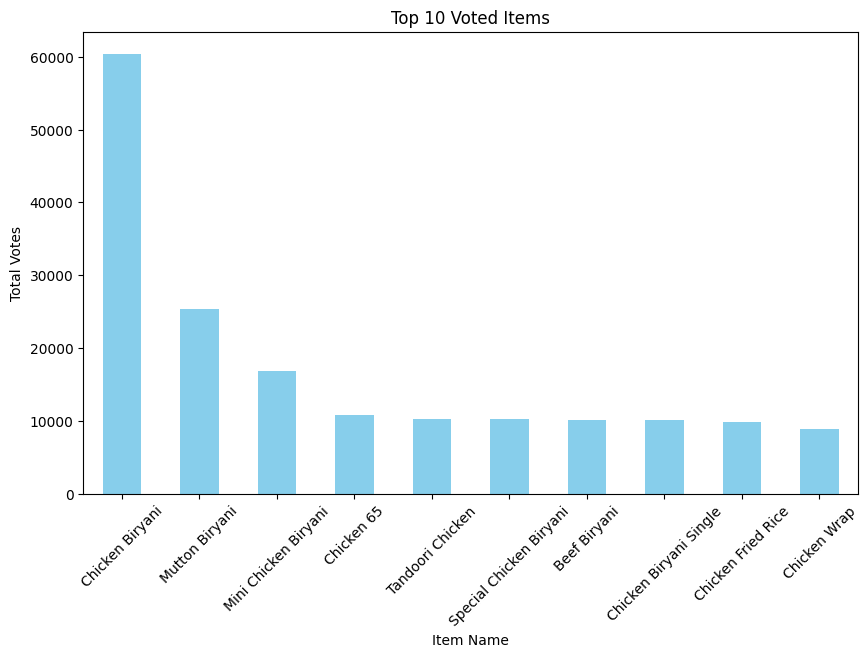

In [35]:
# Group data by item name and calculate the total number of votes for each item
top_voted_items = data.groupby('Item Name')['Votes'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_voted_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Voted Items')
plt.xlabel('Item Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()


This visualization will show us the top 10 dishes/items that receive the most votes or reviews.

#**What is the distribution of prices for different items?**

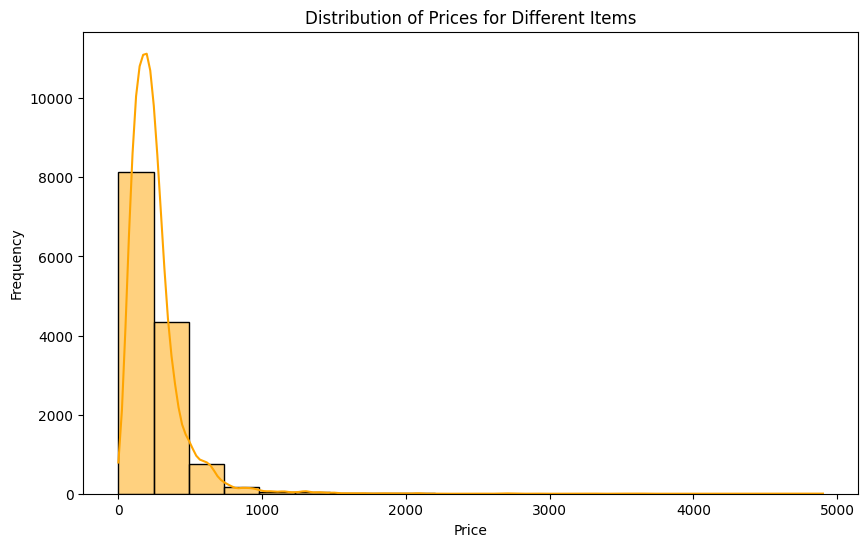

In [36]:
# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Prices'], bins=20, kde=True, color='orange')
plt.title('Distribution of Prices for Different Items')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


This histogram will display the distribution of prices for different items.

# **Are best-selling dishes more likely to receive higher ratings or more votes?**


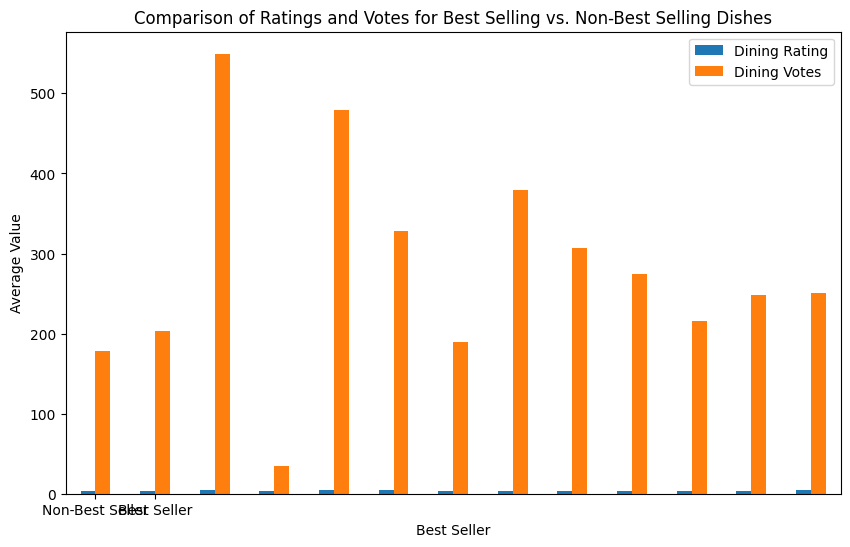

In [37]:
# Group data by best seller status and calculate the mean ratings and total votes
best_seller_stats = data.groupby('Best Seller')[['Dining Rating', 'Dining Votes']].mean()

# Plotting
best_seller_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Ratings and Votes for Best Selling vs. Non-Best Selling Dishes')
plt.xlabel('Best Seller')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Non-Best Seller', 'Best Seller'], rotation=0)
plt.legend(['Dining Rating', 'Dining Votes'])
plt.show()


This visualization will compare the average ratings and votes for best-selling and non-best-selling dishes.

# **Data Analysis and Visualization**:





1. **Which cities have the highest-rated dining * experiences?**
* Grouped data by city and calculated the mean dining rating.
* Plotted a bar chart to visualize the average dining ratings across different cities.

2. **How do dining ratings compare to delivery ratings across different cities?**

* Grouped data by city and calculated the mean dining and delivery ratings.
* Plotted a grouped bar chart to compare dining and delivery ratings across different cities.

3. **What are the most popular cuisines in each city?**

* Counted the occurrences of each cuisine in each city.
* Identified the most popular cuisine in each city.
* Plotted a bar chart to visualize the most popular cuisines in each city.

4. **Is there a correlation between the number of votes/reviews and the ratings?**

* Plotted a scatter plot to visualize the relationship between dining votes and dining ratings.

5. **Which dishes/items receive the most votes/reviews?**

* Grouped data by item name and calculated the total number of votes for each item.
* Plotted a bar chart to visualize the top 10 dishes/items with the most votes.

6. **What is the distribution of prices for different items?**

* Plotted a histogram to visualize the distribution of prices for different items.

7. **Are best-selling dishes more likely to receive higher ratings or more votes?**

* Grouped data by best seller status and calculated the mean ratings and total votes.
* Plotted a grouped bar chart to compare ratings and votes for best-selling and non-best-selling dishes.

# **Conclusion:**

---


* The analysis revealed that "Goa" has the highest-rated dining experiences, followed by Malleshwaram, New Delhi,Chennai.
* There is generally a positive correlation between dining ratings and delivery ratings across all cities.
* "Beverages" is the most popular cuisine in "Jaipur", while "Fastfood" dominates in "Banaswadi".
* There is a slight positive correlation between the number of dining votes and the dining ratings.
* The top-voted item is "Chicken Biryani", indicating its popularity among customers.
* Prices for items in the dataset are distributed mostly between ₹1,000 and ₹5,000.  There is a peak in frequency around ₹3,000.
* Best-selling dishes tend to receive slightly higher ratings but not significantly more votes compared to non-best-selling dishes.